In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [7]:
df=pd.read_csv('Social_Network_Ads.csv')

In [8]:
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
296,15673539,Male,42,73000,1
134,15800061,Female,28,55000,0
1,15810944,Male,35,20000,0
151,15576219,Male,41,45000,0
250,15810075,Female,44,39000,0
39,15782806,Female,27,31000,0
9,15727311,Female,35,65000,0
254,15724161,Female,50,44000,0
379,15749381,Female,58,23000,1
205,15766609,Female,47,47000,0


In [9]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [10]:
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased', axis=1),
                                                       df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape
    

((280, 2), (120, 2))

# Applying Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
#fit the scaler to train set, it will learn the parameters
scalar.fit(X_train)
#applying standardization 
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)


In [29]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [30]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

# Coverting Standardization array into data frame

In [31]:

X_train_scaled = pd.DataFrame(X_train_scaled).rename(columns={0:'Age',1:'EstimatedSalary'})
X_test_scaled = pd.DataFrame(X_test_scaled).rename(columns={0:'Age',1:'EstimatedSalary'})
#I'm facing a 1-Dimensional Error so I try this technique
#X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train)
#it is the formula or syntax to do this but it didn't work for me so i did this

In [32]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [33]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


# Checking mean and std value


In [34]:
print("Before Standardization")
np.round(X_train.describe(),1)


Before Standardization


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [35]:
print("After Standardization")
np.round(X_train_scaled.describe(),1)

After Standardization


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effects of Scaling

Text(0.5, 1.0, 'After Scaling')

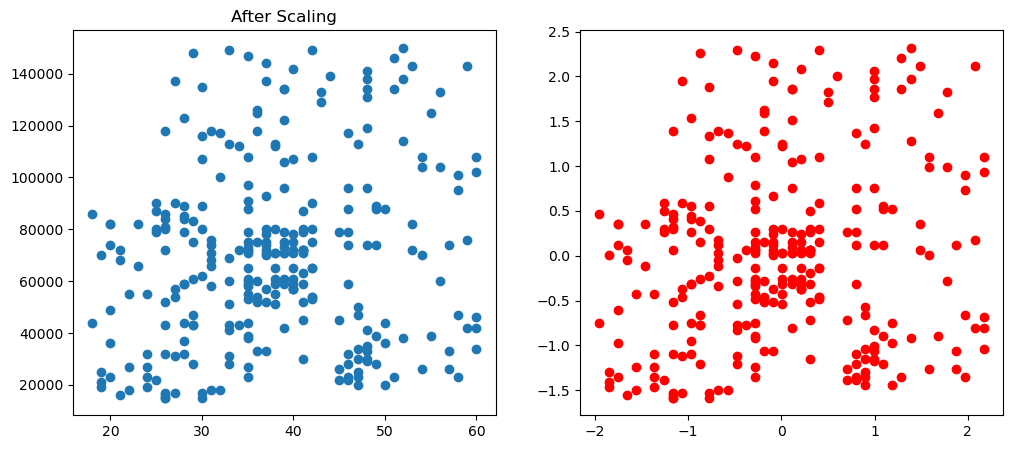

In [36]:
#by Scatter graph
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling
ax1.set_title('Before Scaling')
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

#after scalling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax1.set_title('After Scaling')

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

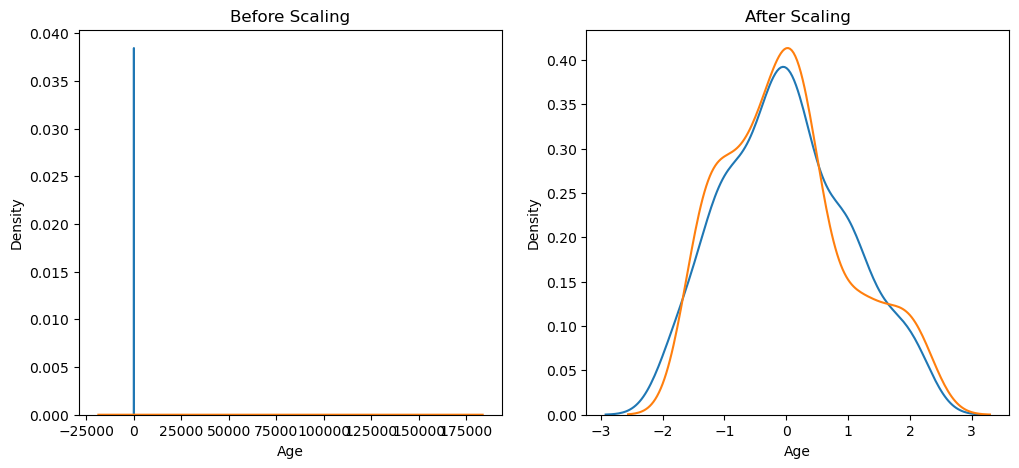

In [37]:
#by kdplot
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
#after scalling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

# Comparison of distribution
## Age

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

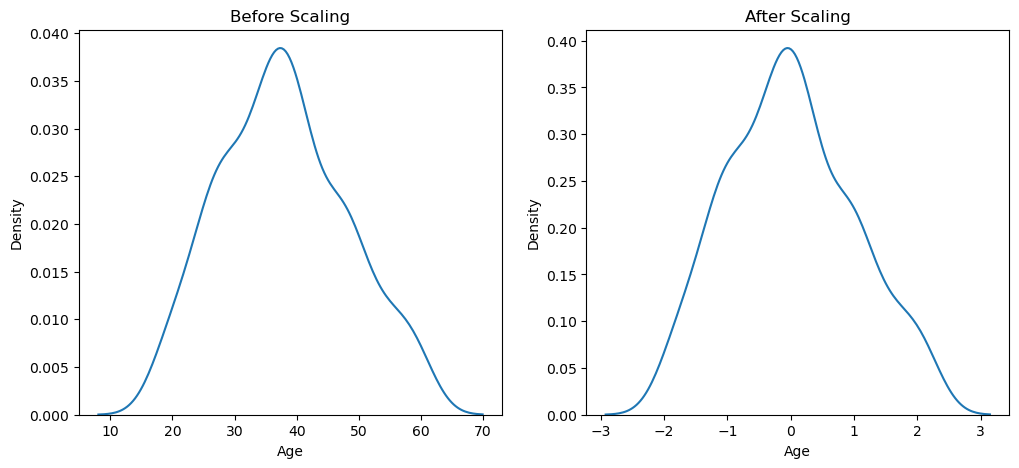

In [38]:
#by kdplot
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scalling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)


# EstimatedSalary

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

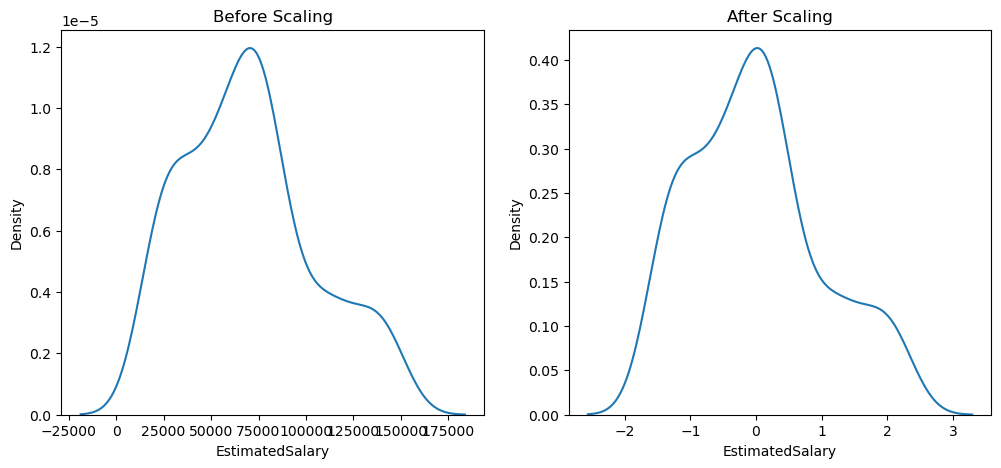

In [39]:
#by kdplot
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scalling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)


# Why Scaling is important?
## BY implementing LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [42]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("Without Scaling",accuracy_score(y_test,y_pred)*100)
print("With Scaling",accuracy_score(y_test,y_pred_scaled)*100)

Without Scaling 65.83333333333333
With Scaling 86.66666666666667
